  
### Create a Regression model using the following algorithms on blackFriday dataset
### 1. Linear Regression
### 2. Support Vector Machine
### 3. KNN

In [1]:
#import essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,metrics,linear_model
import matplotlib
import seaborn as sns

In [2]:
#load the dataset
df=pd.read_csv("D:/machine_learning/blackFriday_train.csv")

In [3]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# check null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
# fill NA values using mode

a=df['Product_Category_2'].mode()[0]


In [6]:
df['Product_Category_2'].fillna(a,inplace=True) 

In [7]:
b=df['Product_Category_3'].mode()[0]


In [8]:
b=df['Product_Category_3'].fillna(b,inplace=True)

In [9]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

<AxesSubplot:>

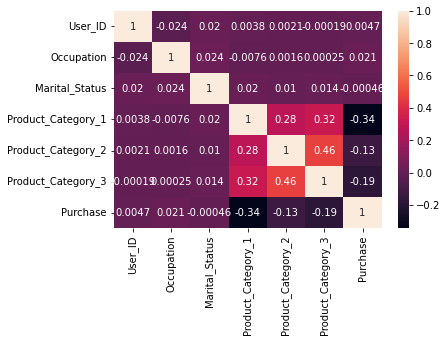

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
#drop unwanted columns
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [12]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

#convert categorial data into numeric data

In [13]:
df['Gender']=df['Gender'].map({'F':0, 'M':1})

In [14]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
df['Age']=df['Age'].map({'0-17':1, '55+':2, '26-35':3, '46-50':4, '51-55':5, '36-45':6, '18-25':7})

In [16]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [17]:
df['City_Category']=df['City_Category'].map({'A':1, 'C':2, 'B':3})

In [18]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("+","")

C:\Users\DjS\AppData\Local\Temp\ipykernel_7592\1951888631.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("+","")


In [19]:
df.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,8.0,16.0,8370
1,0,1,10,1,2,0,1,6.0,14.0,15200
2,0,1,10,1,2,0,12,8.0,16.0,1422
3,0,1,10,1,2,0,12,14.0,16.0,1057
4,1,2,16,2,4,0,8,8.0,16.0,7969


In [20]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [21]:
df.shape

(550068, 10)

In [22]:
df.describe()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.753105,4.453773,8.076707,2.151714,0.409653,5.404270,9.260768,14.989567,9263.968713
std,0.431205,1.759929,6.522660,0.815963,0.491770,3.936211,4.294093,2.739846,5023.065394
min,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.000000,3.000000,2.000000,1.000000,0.000000,1.000000,8.000000,16.000000,5823.000000
50%,1.000000,4.000000,7.000000,2.000000,0.000000,5.000000,8.000000,16.000000,8047.000000
75%,1.000000,6.000000,14.000000,3.000000,1.000000,8.000000,14.000000,16.000000,12054.000000
max,1.000000,7.000000,20.000000,3.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [23]:
# Normalize the data

from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
scaled.fit(df)
scaled_data = scaled.transform(df)
scaled_data

array([[-1.74651251, -1.96245227,  0.29486356, ..., -0.29360542,
         0.36879231, -0.1779729 ],
       [-1.74651251, -1.96245227,  0.29486356, ..., -0.75936196,
        -0.36117636,  1.1817558 ],
       [-1.74651251, -1.96245227,  0.29486356, ..., -0.29360542,
         0.36879231, -1.56119326],
       ...,
       [-1.74651251, -0.82604158,  1.06142262, ..., -0.29360542,
         0.36879231, -1.81701338],
       [-1.74651251, -1.39424693, -1.08494277, ..., -0.29360542,
         0.36879231, -1.77162273],
       [-1.74651251, -0.25783624, -1.23825458, ..., -0.29360542,
         0.36879231, -1.7467375 ]])

In [24]:
#create dataframe of scaled data
df_scaled=pd.DataFrame(scaled_data,columns=['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'])
df_scaled.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,-1.746513,-1.962452,0.294864,-1.411480,0.109801,-0.833018,-0.610809,-0.293605,0.368792,-0.177973
1,-1.746513,-1.962452,0.294864,-1.411480,0.109801,-0.833018,-1.118912,-0.759362,-0.361176,1.181756
2,-1.746513,-1.962452,0.294864,-1.411480,0.109801,-0.833018,1.675656,-0.293605,0.368792,-1.561193
3,-1.746513,-1.962452,0.294864,-1.411480,0.109801,-0.833018,1.675656,1.103664,0.368792,-1.633858
4,0.572570,-1.394247,1.214734,-0.185933,1.660861,-0.833018,0.659449,-0.293605,0.368792,-0.257805


In [25]:
# take random sample and define dependent and independent variable

df2=df_scaled.sample(15000,random_state=20)
x=df2.iloc[:,:-1].values   #dependent

y=df2.iloc[:,-1].values    #independent

x.shape
y.shape

(15000,)

# Linear regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=15)

In [27]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred=reg.predict(x_test)
y_pred

array([-0.50499671, -0.27350598,  0.38730747, ..., -0.88718237,
       -0.21041448,  0.0126027 ])

In [29]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.12979034272039602

In [30]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse
rmse=np.sqrt(mse)
rmse

0.9265910806932389

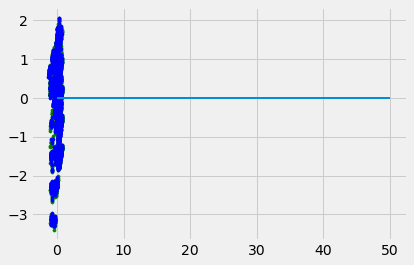

In [31]:
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(x_train),reg.predict(x_train)-y_train,
    color='green',s=10,label='train data')
plt.scatter(reg.predict(x_test),reg.predict(x_test)-y_test,
    color='blue',s=10,label='test data')
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

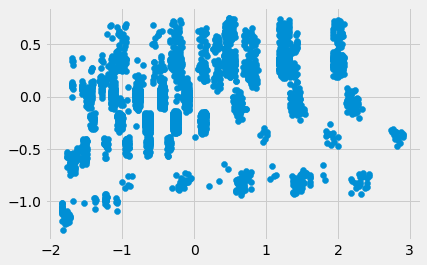

In [32]:
plt.scatter(y_test,y_pred)

# KNN algorithm

In [34]:
#Fitting K-NN classifier to the training set  

from sklearn.neighbors import KNeighborsRegressor
regressor= KNeighborsRegressor(n_neighbors=5) 
regressor.fit(x_train, y_train) 

KNeighborsRegressor()

In [35]:
#Predicting the test set result  
y_predict= regressor.predict(x_test) 

In [36]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)
score

0.1999827418584449

In [50]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_predict)
mse
rmse=np.sqrt(mse)
rmse

0.888435377796959

# SVM algorithm

In [39]:
from sklearn import svm
from sklearn.svm import SVR

In [40]:
list1=['rbf','linear','poly']
list2=[]
for i in range(0,len(list1)):
    svr=svm.SVR(kernel=list1[i])
    svr.fit(x_train,y_train)
    y_pred=svr.predict(x_test)
    from sklearn.metrics import mean_squared_error
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    list2.append(rmse)

print(list2)

[0.8589237207728079, 0.9472971022553524, 0.9029210084034263]


In [41]:
df2=pd.DataFrame({'kernel':list1,'rmse':list2})
df2

,kernel,rmse
0,rbf,0.858924
1,linear,0.947297
2,poly,0.902921


<AxesSubplot:>

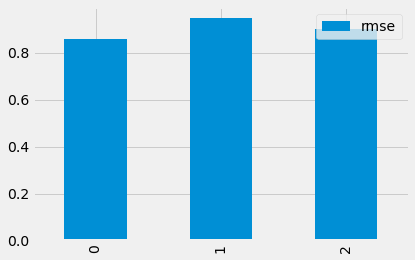

In [42]:
df2.plot(kind='bar')

In [43]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,y_pred)
print("r2_score with rbf kernel ",acc)

r2_score with rbf kernel  0.17368205621974087


In [44]:
# r2 score w.r.t each kernel
list1=['rbf','linear','poly']
list2=[]
for i in range(0,len(list1)):
    svr=svm.SVR(kernel=list1[i])
    svr.fit(x_train,y_train)
    y_pred=svr.predict(x_test)
    
    score=r2_score(y_test,y_pred)
    list2.append(score)
print(list2)


[0.25224924303783114, 0.09046359771384815, 0.17368205621974087]


In [45]:
# create dataframe

df4=pd.DataFrame({'kernel':list1,'r2 score':list2})
df4

,kernel,r2 score
0,rbf,0.252249
1,linear,0.090464
2,poly,0.173682


<AxesSubplot:>

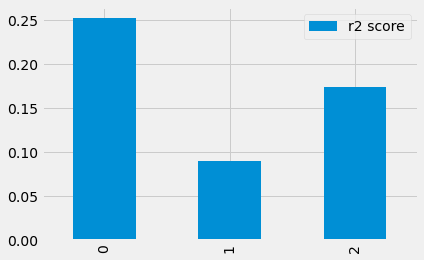

In [46]:
df4.plot(kind='bar')

# Conclusion:
root mean square error for linear regression is 0.9265

root mean square error for KNN is 0.8884

root mean square error for SVM is 0.8589

As we seen that rmse in case of SVM is least among the three,so we conclude that our model performs well with SVM